## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
# в наборе данных нет категориальных переменных
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [ ]:
# в наборе данных нет пропущенных значений
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

std_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=data['feature_names'])
X_test = pd.DataFrame(std_scaler.transform(X_test), columns=data['feature_names'])

knn_accuracy = {'NN': [], 'Train': [], 'Test': []}

for k in [1, 3, 5, 10, 15, 25]:
    knn_accuracy['NN'] += [k]

    y_train_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train.iloc[:, [0, 4]], y_train).predict(X_train.iloc[:, [0, 4]])
    knn_accuracy['Train'] += [round(np.mean(y_train_predicted == y_train), 2)]

    y_test_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train.iloc[:, [0, 4]], y_train).predict(X_test.iloc[:, [0, 4]])
    knn_accuracy['Test'] += [round(np.mean(y_test_predicted == y_test), 2)]

print(pd.DataFrame(knn_accuracy).to_string(index=False))

 NN  Train  Test
  1   1.00  0.54
  3   0.85  0.59
  5   0.84  0.59
 10   0.77  0.63
 15   0.74  0.59
 25   0.73  0.63


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
%pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

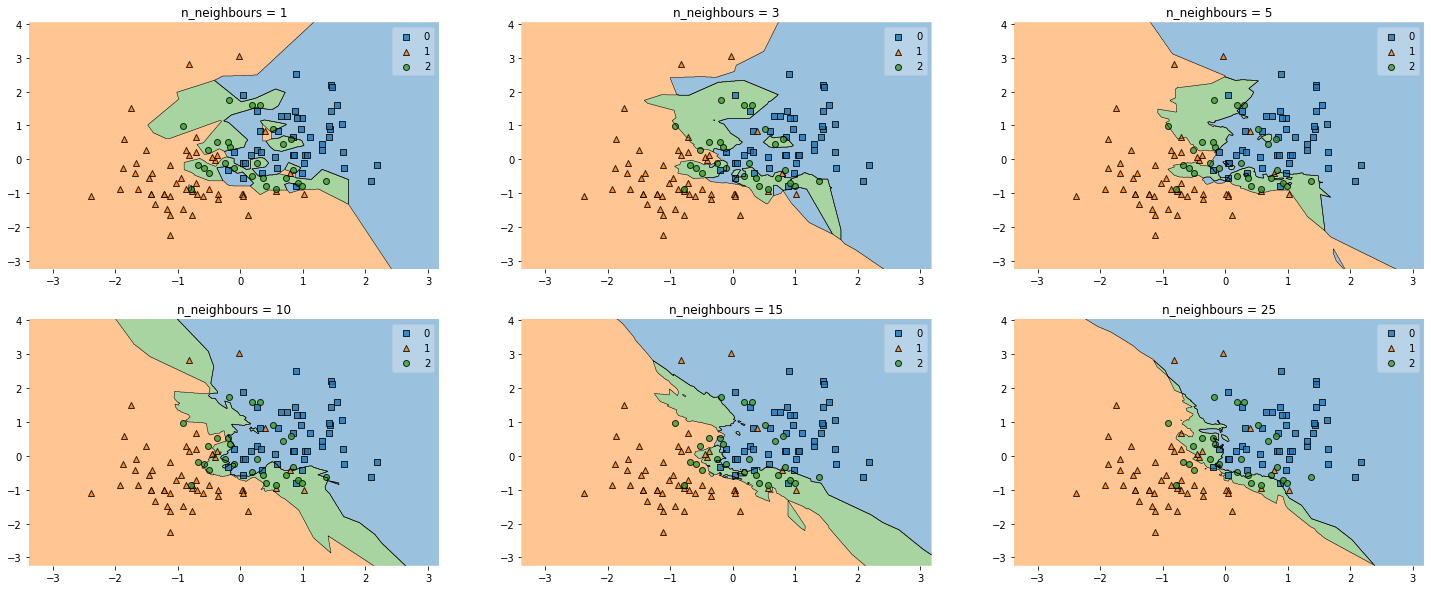

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(25, 10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']

for clf, lab, grd in zip([KNeighborsClassifier(n_neighbors=k) for k in [1, 3, 5, 10, 15, 25]],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    clf.fit(X_train.iloc[:, [0, 4]], y_train)
    ax = fig.add_subplot(gs[grd[0], grd[1]])
    ax = plot_decision_regions(X=np.array(X_train.iloc[:, [0, 4]]), y=y_train, clf=clf)
    ax.set_title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

При $k = 1$ границы между классами резкие, рельефные, угловатые; внутри оранжевого и синего классов наблюдаем зелёные "островки" шумовых объектов. Доля правильных ответов на тесте самая низкая $-$ $0.54$, при этом на трейне она равна $1$. Всё это говорит о переобучении.

По мере роста $k$ наблюдаем, как границы между классами становятся более гладкими и непрывными, хотя "островки" не пропадают, но сильно уменьшаются и превращаются в еле заметные точки.

Самое лучшее значение на тесте ($0.63$) достигается при $k = 10$ и $k = 25$. График при $k = 10$ не выглядит разумным, поскольку зелёный класс значительно "захватывает" оранжевый по краям границы. Поэтому предпочтительнее значение $k = 25$, но так как зелёный класс распределён неравномерно, то и здесь мы видим некоторые сложности. Например, границы зелёного класса всё ещё заходят за оранжевый, особенно это заметно в левом нижнем углу. Также можно наблюдать некоторую выпуклость в эпицентре скопления точек на границе зелёного и синего классов.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота.

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз.

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса.

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

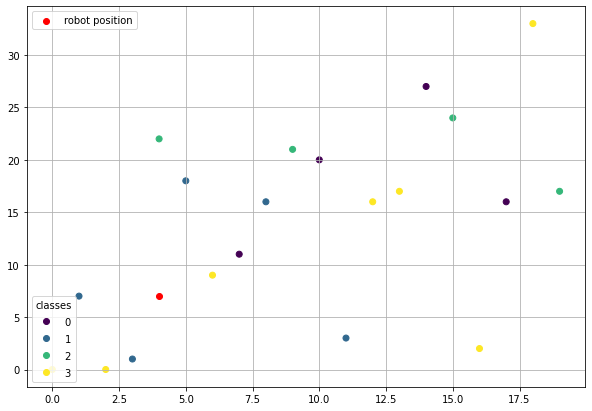

In [ ]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(x, landmarks, c=random_classes)
ax.scatter(4, 7, c='r', marker='o', label='robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc='lower left', title='classes')
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами.

In [ ]:
class MobileRobot():

    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours

        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)

        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points

        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks

        '''
        # Store the history of movements
        self.trajectory = (initial_position,)

        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)

        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]),
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}

    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        last_step = self.trajectory[-1]
        heads = np.random.binomial(1, 0.2)
        tails = 1 - heads
        self.trajectory += (heads * (last_step + self.mapping[0]) +
                            tails * (last_step + self.mapping[int(self.knn.predict(last_step.reshape(1, 2)))]),)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [ ]:
def conduct_experiment(x,
                       mean=0,
                       std=2,
                       n_movements=10,
                       k=3,
                       initial_position=np.array([10, 20]),
                       label=None,
                       grid=[0, 0]):

    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T

    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size=len(x))

    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)

    for n in range(n_movements):
        robot.move()

    ax = fig.add_subplot(gs[grid[0], grid[1]])
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c=classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc='lower left', title='classes')
    ax.add_artist(legend1)
    ax.set_title(label, fontweight='bold')

    traj = np.vstack(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1],
               c='r', marker='o', label='robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

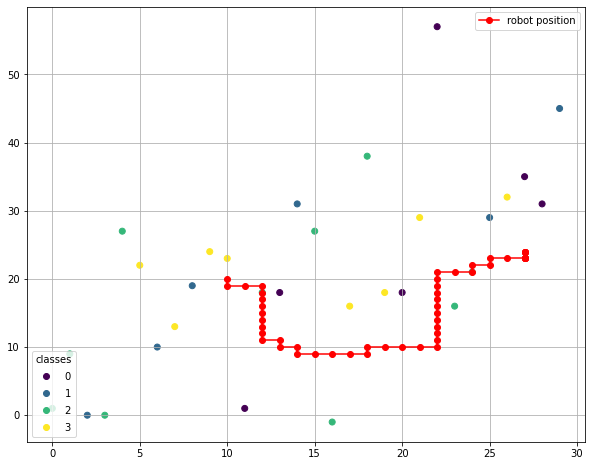

In [ ]:
gs = gridspec.GridSpec(1, 1)

fig = plt.figure(figsize=(10, 8))

x = np.arange(30)
conduct_experiment(x, mean=3, std=10, k=5, n_movements=50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно?

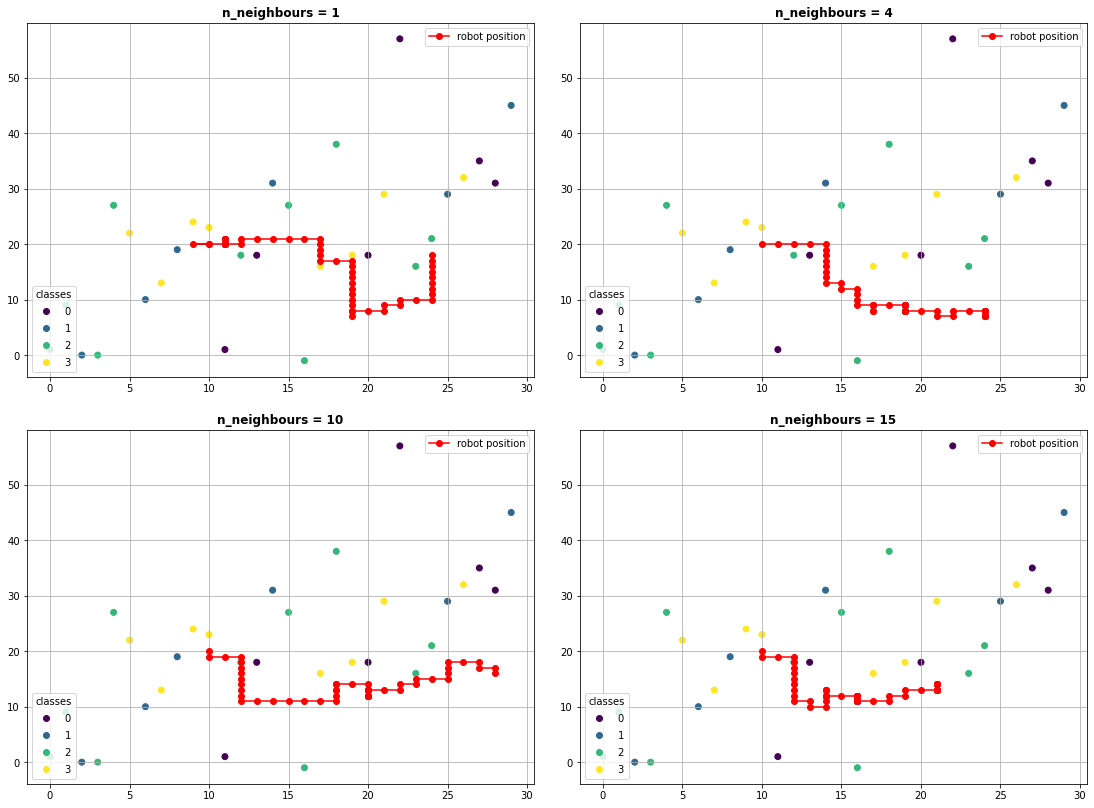

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(19, 14))

labels = ['n_neighbours = 1', 'n_neighbours = 4', 'n_neighbours = 10', 'n_neighbours = 15']

for k, lab, grd in zip([1, 4, 10, 15],
                       labels,
                       itertools.product([0, 1], [0, 1])):
    conduct_experiment(x, mean=3, std=10, k=k, n_movements=50, label=lab, grid=grd)

plt.subplots_adjust(wspace=0.09, hspace=0.15)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
# в наборе данных нет пропущенных значений
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
# видим, что цена сильно зависит от карата (неудивительно) и габаритов алмаза (от x, y, z по убыванию)
print(data.corr())

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = pd.DataFrame(data.drop('price', axis=1))
y = np.array(data.price)

np.random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
X_train_transformed = pd.DataFrame(std_scaler.fit_transform(X_train.iloc[:, :6]),
                                   columns=X.columns[:6],
                                   index=X_train.index)
X_train = pd.concat([X_train_transformed, X_train.iloc[:, 6:]], axis=1)

X_test_transformed = pd.DataFrame(std_scaler.transform(X_test.iloc[:, :6]),
                                  columns=X.columns[:6],
                                  index=X_test.index)
X_test = pd.concat([X_test_transformed, X_test.iloc[:, 6:]], axis=1)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression().fit(X_train, y_train)
print(f'RMSE Train: {mean_squared_error(y_train, lin_reg.predict(X_train))}',
      f'\nRMSE Test: {mean_squared_error(y_test, lin_reg.predict(X_test))}')

RMSE Train: 1295920.7310854404 
RMSE Test: 1263039.43774769


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
# на первом месте - карат (сильно отстает от всех), на втором - габариты по х, на третьем - по y
print(f'Свободный коэффициент: {lin_reg.intercept_}',
      f'\nВеса: {lin_reg.coef_}')

Свободный коэффициент: -98.59552886402162 
Веса: [ 5363.93392431   -99.19841637   -65.08485867 -1544.20339181
   417.8699926    -33.58965226   518.52828179   775.24235401
   722.20887585   664.46450373  -221.88506357  -283.97209778
  -504.34847923  -994.99919011 -1484.19284792 -2420.80781799
  5388.91652548  3656.15442345  2673.90785478  4572.16790233
  4268.9665095   5028.58131329  4967.20006051]


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# веса при переменных, которые сильно зависели от целевой переменной, в целом уменьшились
# коэффициент при габаритах по у вообще занулился, значит, цена не очень-то зависела от этого параметра
# как и от параметра z, поскольку его вес совсем мал
# но первый коэффициент всё ещё на порядок выше других
lasso = Lasso(10).fit(X_train, y_train)
print(f'Свободный коэффициент после L1-регуляризации: {lasso.intercept_}',
      f'\nВеса после L1-регуляризации: {lasso.coef_}\n')

# веса слегка уменьшились, но мало что поменялось
ridge = Ridge(10).fit(X_train, y_train)
print(f'Свободный коэффициент после L2-регуляризации: {ridge.intercept_}',
      f'\nВеса после L2-регуляризации: {ridge.coef_}')

Свободный коэффициент после L1-регуляризации: 3832.1785663159444 
Веса после L1-регуляризации: [ 4811.88500226  -160.46760964  -113.71648909  -720.49744337
    -0.            -8.91890682    -0.           154.52446395
    68.68366456    72.39795628     0.            -0.
  -135.85283363  -607.0465061  -1019.75813075 -1827.34388168
  1358.73268972     0.          -833.78178112   823.65520361
   584.49588518  1182.63308544  1193.04549368]

Свободный коэффициент после L2-регуляризации: 413.13210233916016 
Веса после L2-регуляризации: [ 5312.39950398  -102.42992405   -68.02330937 -1440.43163292
   355.23589376   -35.28781858   550.00960986   809.9479328
   751.33143613   701.9887886   -208.65811392  -270.61511677
  -486.85685793  -976.55921664 -1460.12405033 -2384.5128979
  4782.37096627  3094.00914044  2119.60179109  4001.503571
  3703.48258618  4444.05826263  4390.38351608]


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

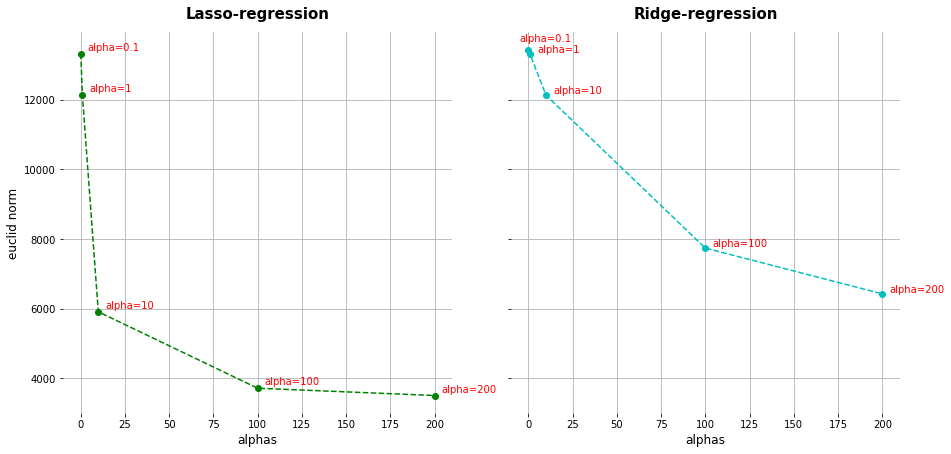

In [ ]:
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

alphas = [0.1, 1, 10, 100, 200]
lasso_norm = [np.linalg.norm(Lasso(alpha).fit(X_train, y_train).coef_) for alpha in alphas]
ridge_norm = [np.linalg.norm(Ridge(alpha).fit(X_train, y_train).coef_) for alpha in alphas]

fig, (lasso_graph, ridge_graph) = plt.subplots(ncols=2, figsize=(15, 7), sharey=True)

lasso_graph.plot(alphas, lasso_norm, '--g', marker='o')
lasso_graph.set_xlabel('alphas', fontsize=12)
lasso_graph.set_ylabel('euclid norm', fontsize=12)
lasso_graph.grid(True)
lasso_graph.set_title('Lasso-regression', fontsize=15, fontweight='bold', y=1.02)

for i in range(5):
    lasso_graph.annotate(f'alpha={alphas[i]}', xy=(4 + alphas[i], 100 + int(lasso_norm[i])), color='r')

ridge_graph.plot(alphas, ridge_norm, '--c', marker='o')
ridge_graph.set_xlabel('alphas', fontsize=12)
ridge_graph.grid(True)
ridge_graph.set_title('Ridge-regression', fontsize=15, fontweight='bold', y=1.02)

for i in range(5):
    if i == 0:
        ridge_graph.annotate('alpha=0.1', xy=(-5 + alphas[0], 220 + int(ridge_norm[0])), color='r')
        continue
    ridge_graph.annotate(f'alpha={alphas[i]}', xy=(4 + alphas[i], 50 + int(ridge_norm[i])), color='r')

plt.subplots_adjust(wspace=0.15)
sns.despine(left=True, bottom=True, right=True)
plt.show()

График Lasso-регрессии резко падает вниз, следовательно, Lasso агрессивно действует на веса в противоположность Ridge-регрессии: её график довольно плавный и мягкий, чем-то напоминает ветвь параболы. Такое резкое падение в графике Lasso-регрессии может быть по причине того, что Lasso зануляет некоторые коэффициенты, что уменьшает норму вектора и способствует отбору признаков. Ridge-регрессия существенно меняет коэффициенты только при $\alpha = 100$, в то время как для Lasso-регрессии $-$ это значение $\alpha = 10$. При этом норма векторов в этих точках также неодинакова: при Ridge-регрессии показатель хуже $-$ норма больше на ~$2000$ единиц измерения.

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

cross_validation = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)
cross_val_alphas = cross_validation.alphas_.tolist()
mse_matrix = cross_validation.mse_path_
mse_matrix_mean = np.apply_along_axis(np.mean, 1, mse_matrix).tolist()

print(f'Порядок значений альф: {cross_val_alphas}',
      f'\nМатрица ошибок:\n {mse_matrix}',
      f'\nУсреднённые значения по строкам матрицы ошибок: {mse_matrix_mean}')

best_alpha = cross_val_alphas[mse_matrix_mean.index(min(mse_matrix_mean))]

print(f'Лучшее значение альф: {best_alpha}')

Порядок значений альф: [200.0, 100.0, 10.0, 1.0, 0.1] 
Матрица ошибок:
 [[2602008.28170391 2448939.31954332 2481826.7569725  2357287.9061451
  2527999.41552734]
 [2373374.17452254 2225456.06044206 2254162.51777862 2131338.76011862
  2299646.27931141]
 [1594488.27597184 1484303.95009874 1528573.85574455 1407635.12948467
  1617900.46198207]
 [1386139.67622329 1270957.66611246 1295392.57945407 1209294.9916875
  1363161.8103362 ]
 [1392295.95908742 1264037.8472179  1287343.85760177 1210938.49224493
  1351031.99130584]] 
Усреднённые значения по строкам матрицы ошибок: [2483612.3359784335, 2256795.5584346512, 1526580.334656374, 1304989.3447627043, 1301129.6294915746]
Лучшее значение альф: 0.1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
# наиболее информативный признак - это карат, т.е. масса алмаза, очевидно, что
# чем больше алмаз, тем выше его цена
# масса напрямую зависит от объёма, а объём - от габаритов алмаза, поэтому
# веса при габаритах по x, y всё ещё остаются большими по модулю в сравнении
# с другими вещественными признаками
model = Lasso(best_alpha).fit(X_train, y_train)

print(f'Свободный коэффициент в итоговой модели: {model.intercept_}',
      f'\nВеса в итоговой модели: {model.coef_}')

Свободный коэффициент в итоговой модели: -45.524250772933556 
Веса в итоговой модели: [ 5359.03454376  -100.5376891    -65.96042298 -1476.05523307
   352.72651734   -32.83834512   512.03993673   768.34113003
   713.03082608   659.28221634  -216.49343329  -278.56958478
  -498.62328689  -989.29383183 -1477.42450707 -2412.60539187
  5333.96452166  3604.6937341   2622.65048827  4519.83141909
  4217.15385126  4975.09147688  4914.59152318]


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
# в целом, модели практически одинаковые, хотя итоговая показывает чуть более лучший результат
# из-за чуть более уменьшенных коэффициентов
# в результате регуляризации мы не очень-то сильно изменили веса, возможно поэтому RMSE почти не изменилась
RMSE_final = mean_squared_error(y_test, model.predict(X_test))
RMSE_lin_reg = mean_squared_error(y_test, lin_reg.predict(X_test))
print(f'RMSE Test для итоговой модели: {RMSE_final}',
      f'\nРазница между RMSE Test для обычной линейной регрессии и для итоговой модели: {RMSE_lin_reg - RMSE_final}')

RMSE Test для итоговой модели: 1254479.3719707632 
Разница между RMSE Test для обычной линейной регрессии и для итоговой модели: 8560.065776926698


**Оценка: 9.2 / 10**

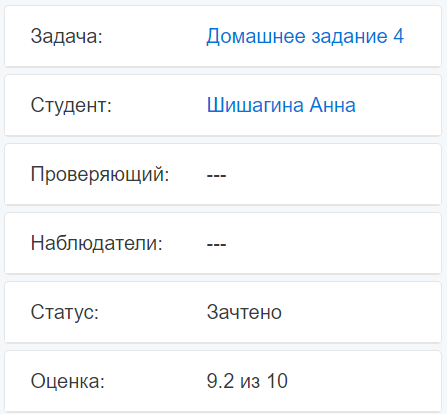